# Visualisation of the first Szene

The Goal is, to show our logic and definition of a playmaker.
The definition are follows:
 - Who created the biggest Space in the opponetn Defends
 - Who is nearer to the Goal

In [47]:
import pandas as pd
import hockey_rink as hr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [65]:
df = pd.read_csv('../data/CleanData/2_Drittel_988_1001.csv')

In [66]:
df.head()

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection3,StartPlayerDirection4,StartPlayerDirection5,StartPlayerDirection6,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12
0,2649,2,988,1704026093174,Goal,AwayPowerplay,4v5,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2650,2,988,1704026093360,PuckControl,AwayPowerplay,4v5,True,True,HomeTeamZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2651,2,988,1704026094020,StoppageOfPlay,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2652,2,988,1704026142900,Faceoff,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2653,2,988,1704026142900,PuckControl,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# each row has a column EventStartCoordinate and EventEndCoordinate which if applicable, contains the x and y coordinates of the event.
# these columns need to be split into two columns, one for x and one for y
df[['EventStartX', 'EventStartY']] = df['EventStartCoordinate'].str.split(',', expand=True)
df[['EventEndX', 'EventEndY']] = df['EventEndCoordinate'].str.split(',', expand=True)

In [68]:
# convert the columns to numeric
df['EventStartX'] = pd.to_numeric(df['EventStartX'])
df['EventStartY'] = pd.to_numeric(df['EventStartY'])
df['EventEndX'] = pd.to_numeric(df['EventEndX'])
df['EventEndY'] = pd.to_numeric(df['EventEndY'])


In [69]:
df.head()

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection7,StartPlayerDirection8,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY
0,2649,2,988,1704026093174,Goal,AwayPowerplay,4v5,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2650,2,988,1704026093360,PuckControl,AwayPowerplay,4v5,True,True,HomeTeamZone,...,NaN,NaN,NaN,NaN,NaN,NaN,-27.4,-1.0,-27.1,0.1
2,2651,2,988,1704026094020,StoppageOfPlay,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2652,2,988,1704026142900,Faceoff,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2653,2,988,1704026142900,PuckControl,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.0,6.1,-1.2


In [70]:
# create a rink object
rink = hr.IIHFRink()

In [90]:
# convert the x and y coordinates to the rink coordinates using the rink.convert method
# the coordinates of the board in the hockey_rink package for the IIHF rink are length 197 and width 98.4
df['RinkX'], df['RinkY'] = rink.convert_xy(df['EventStartX'] * 3.2833 , df['EventStartY']*3.28)


In [72]:
shots = df[df['EventType'] == 'Shot']

In [73]:
passE = df[df['EventType'] == 'Pass']

In [74]:
crossings = df[df['EventType'] == 'BluelineCrossing']

<Axes: xlabel='RinkX', ylabel='RinkY'>

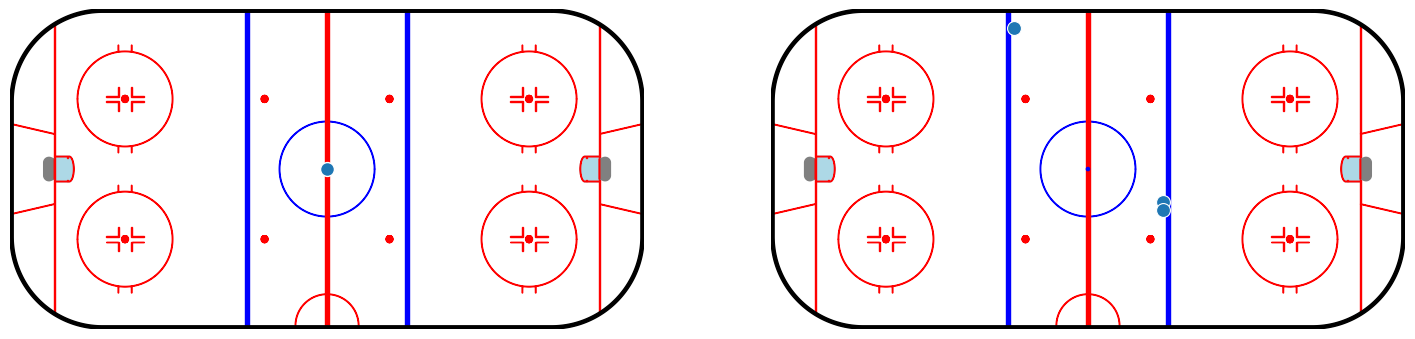

In [91]:
# plot the corssings on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=crossings, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=crossings, ax=axs[1])

<Axes: xlabel='RinkX', ylabel='RinkY'>

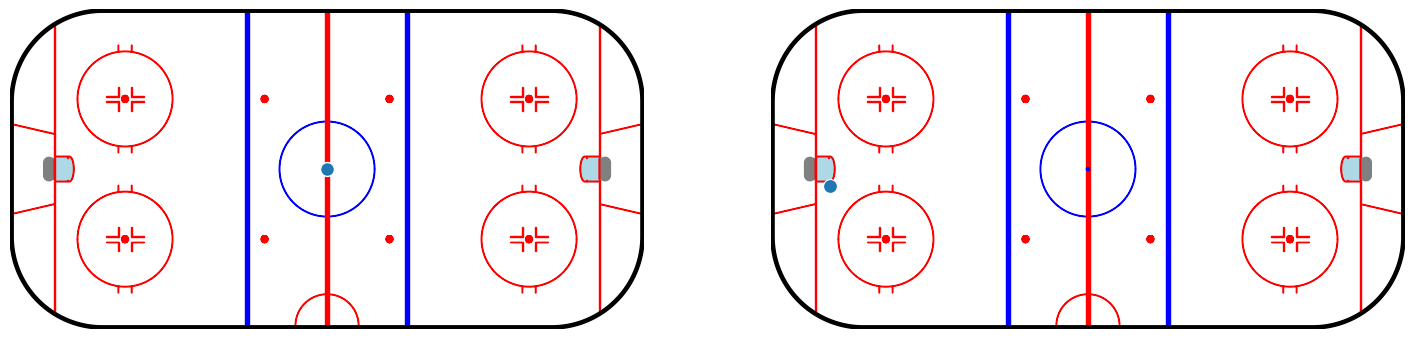

In [92]:
# plot shots on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=shots, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=shots, ax=axs[1])

<Axes: xlabel='RinkX', ylabel='RinkY'>

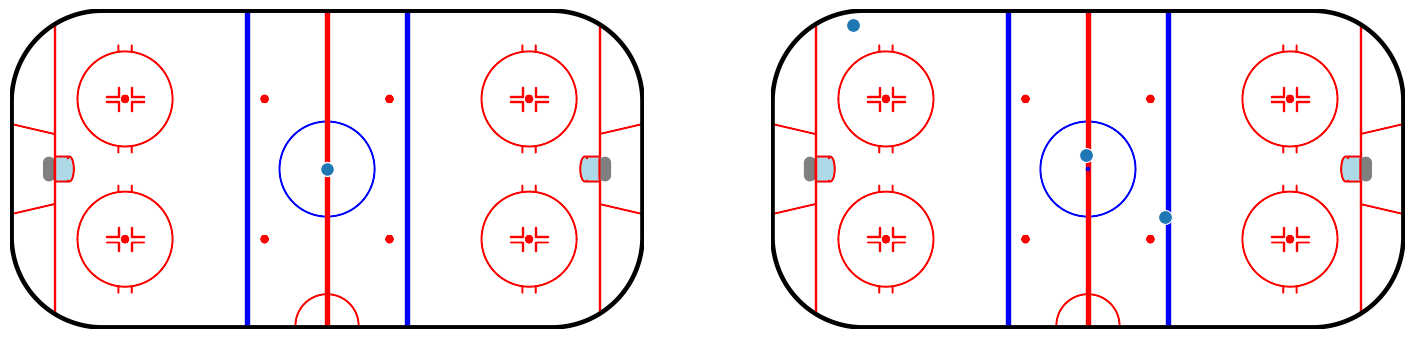

In [101]:
# plot passes on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=passE, ax=axs[0])
rink.plot_fn(sns.scatterplot, x="RinkX", y="RinkY", s=100, legend=False, data=passE, ax=axs[1])


AttributeError: 'numpy.ndarray' object has no attribute 'add_patch'

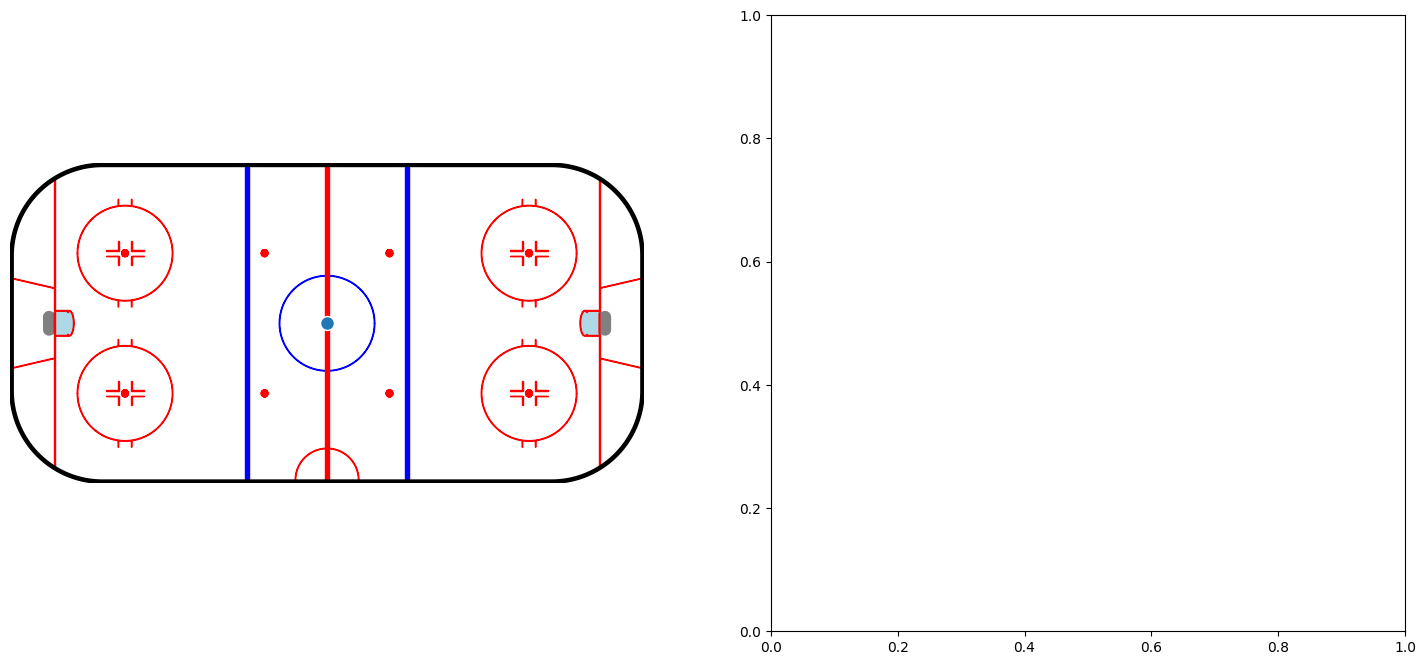

In [283]:
# plot Goals on the rink    
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
rink.scatter("x", "y",  s=100, edgecolor="white", data=passE, ax=axs[0])

# the coordinates of the board in the hockey_rink package for the IIHF rink are length 197 and width 98.4
goal_coords = pd.DataFrame({'x': [-26.0 * 3.2833], 'y': [0 *3.28]})

circle = plt.Circle((0, 0), 5, color='blue', fill=False)
axs.add_patch(circle)

rink.plot_fn(sns.scatterplot, x='x', y='y',s=100, legend=False, data=goal_coords, ax=axs[1])

In [284]:
shots

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection9,StartPlayerDirection10,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY,RinkX,RinkY
21,2670,2,1000,1704026154180,Shot,FullStrength,5v5,True,True,HomeTeamZone,...,"-0.798,0.602","0.098,-0.995","0.309,-0.951","0.598,-0.802",-24.7,-1.6,NaN,NaN,-81.09751,-5.248


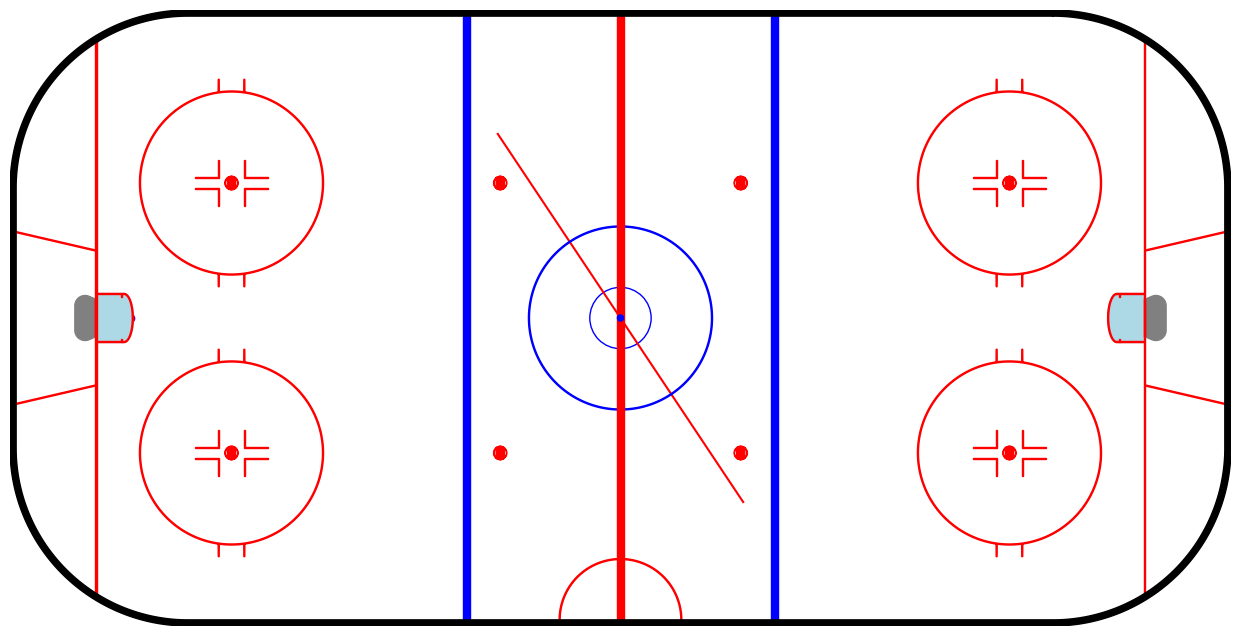

In [296]:
# Erstelle den Plot
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)  # Nur eine subplot Achse

# Zeichne das Rink
rink.draw(ax=ax)

# Zeichne mehrere Formen
# Kreis
circle = plt.Circle((0, 0), 5, color='blue', fill=False)
ax.add_patch(circle)


# Linie
line = plt.Line2D((-20, 20), (30, -30), color='red')
ax.add_line(line)

# Punkte

goal_x = [(-26.0 * 3.2833), -80]
goal_y = [(0 * 3.28), 0]

points_x = [10, -10, 15]
points_y = [10, -10, -5]
ax.scatter(goal_x, goal_y, color='purple')

plt.show()

# Visualize the Area around the Player to the next Opponent and Distance to the Goal

In [112]:
#X, Y, Team from MainPlayer
def distance_to_enemy_goal(X,Y,Team):
    
    rightGoal = [26.0,0.0]
    leftGoal = [-26.0, 0.0]
    
    if Team == 'Home':
        enemygoal = rightGoal
    
    if Team == 'Away':
        enemygoal = leftGoal
        
    return math.sqrt((enemygoal[0] - X)**2 + (enemygoal[1] - Y)**2)

distance_to_enemy_goal(-3,0,'Away')
    
    

23.0

In [268]:
# X, Y, Team from MainPlayer and dataframe from Topic all Players
def mean_distance_to_opponents(X,Y,Team, df: pd.DataFrame):
    
    distances_to_opponents = []
    main_player_team = ""
    opponent_team = ""
    
    if Team == 'Home':
        main_player_team = "Home"
        opponent_team = "Away"
    elif Team == 'Away':
        main_player_team = "Away"
        opponent_team = "Home"   
    else:
        print("Error: The team is neither home nor away.")
        
    for i in range(1, 12):

        coords_primary = [X,Y]
        float_coords_primary = [float(coord) for coord in coords_primary]
        
        if df[f'StartPlayerTeam{i}'] == opponent_team: 
            
            if type(df[f'StartPlayerCoordinates{i}']) == str:
                coords_opponent = df[f'StartPlayerCoordinates{i}'].split(',')

            elif type(df[f'StartPlayerCoordinates{i}']) == tuple:
                coords_opponent = df[f'StartPlayerCoordinates{i}']
                
            value = math.sqrt((float_coords_primary[0] - float(coords_opponent[0])) ** 2 + (float_coords_primary[1] - float(coords_opponent[1])) ** 2)
            distances_to_opponents.append(value)

    return sum(distances_to_opponents)/len(distances_to_opponents)


In [249]:
df01 = df[(df['EventType'] == 'Shot') | (df['EventType'] == 'Pass')]
df02 = df01.iloc[0]

type(df02['StartPlayerCoordinates2'])


str

In [263]:
cor = df02['StartPlayerCoordinates2'].split(',')
float(cor[0])


8.1

In [269]:
mean_distance_to_opponents(-3, 0, 'Home', df02)


11.983713967571324

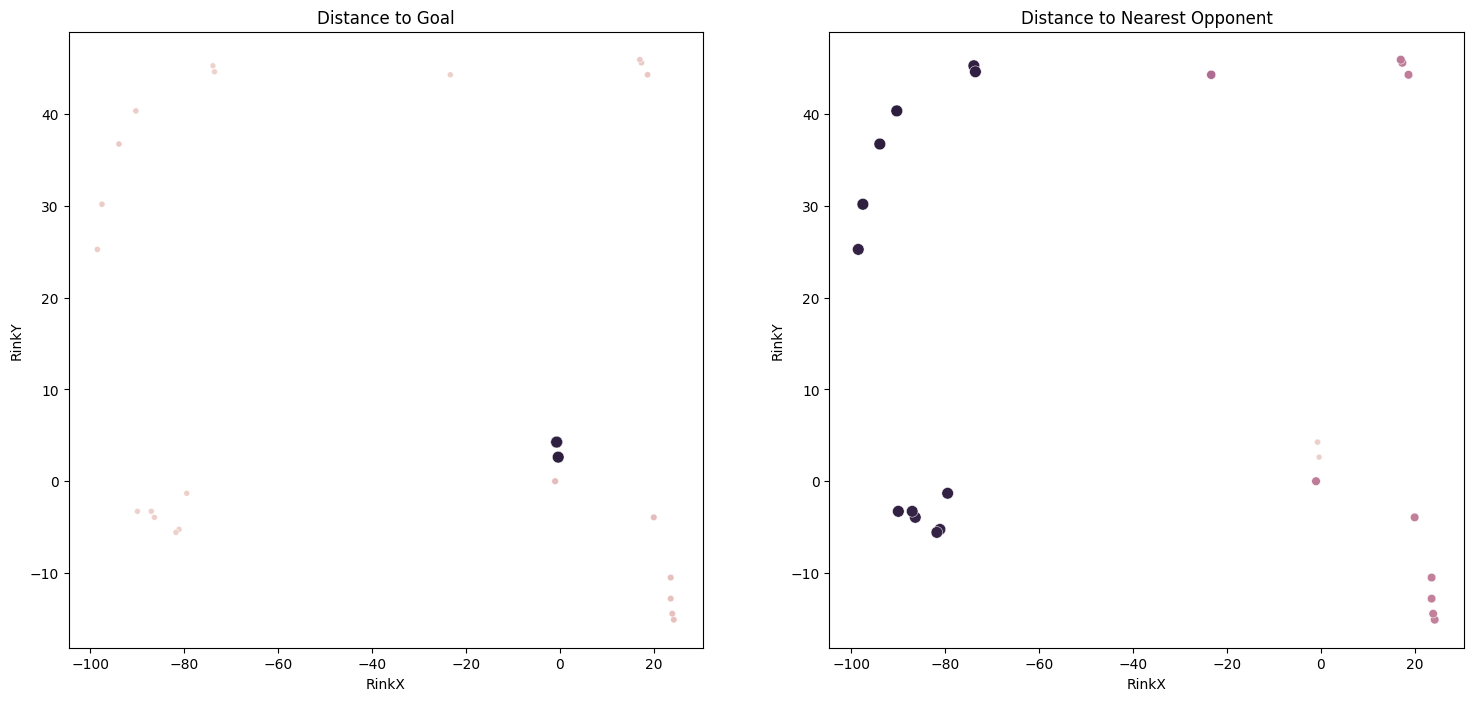

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Define goal positions for IIHF rink (standard positions)
GOAL_POSITIONS = {'left_goal': (-98.4 / 2, 0), 'right_goal': (98.4 / 2, 0)}

# Function to calculate Euclidean distance
def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

# Function to calculate the distance to the nearest opponent
def calculate_nearest_opponent_distance(row):
    player_coords = row['StartPlayerCoordinates1']  # Assume player 1 is the one of interest
    
    # Collect all opponent coordinates (columns 2 to 12)
    opponent_columns = [f'StartPlayerCoordinates{i}' for i in range(2, 13)]
    opponents = [eval(row[col]) if pd.notnull(row[col]) else (np.nan, np.nan) for col in opponent_columns]
    
    # Filter valid opponent coordinates (no NaN)
    opponents = [coords for coords in opponents if not any(np.isnan(coords))]
    
    if len(opponents) == 0 or any(np.isnan(player_coords)):
        return np.nan
    
    # Calculate the Euclidean distance to each opponent
    distances = [calculate_distance(player_coords, opp) for opp in opponents]
    
    # Return the minimum distance (nearest opponent)
    return min(distances)

# Function to calculate distance to the goal
def calculate_goal_distance(player_coords, team):
    if team == 'Home':
        goal_coords = GOAL_POSITIONS['left_goal']
    else:
        goal_coords = GOAL_POSITIONS['right_goal']
    
    # Calculate distance to the goal
    return calculate_distance(player_coords, goal_coords)

# Adding two new columns to the dataframe: Distance to Goal and Nearest Opponent
df['StartPlayerCoordinates1'] = df['StartPlayerCoordinates1'].apply(lambda x: eval(x) if pd.notnull(x) else (np.nan, np.nan))
df['DistanceToGoal'] = df.apply(lambda row: calculate_goal_distance(row['StartPlayerCoordinates1'], row['StartPlayerTeam1']), axis=1)
df['NearestOpponentDistance'] = df.apply(calculate_nearest_opponent_distance, axis=1)

# Plotting the results on the rink
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Plot with distances to goal
sns.scatterplot(x="RinkX", y="RinkY", size="DistanceToGoal", hue="DistanceToGoal", data=df, ax=axs[0], legend=False)
axs[0].set_title('Distance to Goal')

# Plot with distances to the nearest opponent
sns.scatterplot(x="RinkX", y="RinkY", size="NearestOpponentDistance", hue="NearestOpponentDistance", data=df, ax=axs[1], legend=False)
axs[1].set_title('Distance to Nearest Opponent')

plt.show()




In [80]:
df.head()

,Unnamed: 0,Period,MatchClock,Timestamp,EventType,TeamStrengthType,TeamStrength,HomeGoalieOnIce,AwayGoalieOnIce,EventPosition,...,StartPlayerDirection11,StartPlayerDirection12,EventStartX,EventStartY,EventEndX,EventEndY,RinkX,RinkY,DistanceToGoal,NearestOpponentDistance
0,2649,2,988,1704026093174,Goal,AwayPowerplay,4v5,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2650,2,988,1704026093360,PuckControl,AwayPowerplay,4v5,True,True,HomeTeamZone,...,NaN,NaN,-27.4,-1.0,-27.1,0.1,-89.96242,-3.28,22.600221,37.636419
2,2651,2,988,1704026094020,StoppageOfPlay,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2652,2,988,1704026142900,Faceoff,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.801814,17.707061
4,2653,2,988,1704026142900,PuckControl,FullStrength,5v5,True,True,NeutralZone,...,NaN,NaN,-0.3,0.0,6.1,-1.2,-0.98499,0.00,24.801814,17.707061
